# Imports

In [1]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Activation
from tensorflow.keras import backend as back

# Podria quitar os
import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

# Colocamos la seed para poder replicar los experimentos más delante
seed=1998
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [0]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20

# Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Building the model

In [0]:
model = Sequential([
                    Conv2D(32, (3, 3), 
                           padding='same',
                           activation='relu',
                           input_shape=x_train.shape[1:]),
                    # Activation('relu'),
                    Conv2D(32, (3, 3), activation='relu'),
                    # Activation('relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    # Activation('relu'),
                    Conv2D(64, (3, 3), activation='relu'),
                    # Activation('relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation='relu'),
                    # Activation('relu'),
                    Dropout(0.5),
                    Dense(num_classes, activation='softmax')
                    # Activation('softmax')
])

In [0]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 208us/sample - loss: 0.7626 - accuracy: 0.7363 - val_loss: 0.7580 - val_accuracy: 0.7387
Epoch 2/20
50000/50000 [==============================] - 10s 197us/sample - loss: 0.7542 - accuracy: 0.7423 - val_loss: 0.7346 - val_accuracy: 0.7485
Epoch 3/20
50000/50000 [==============================] - 10s 197us/sample - loss: 0.7441 - accuracy: 0.7447 - val_loss: 0.7196 - val_accuracy: 0.7531
Epoch 4/20
50000/50000 [==============================] - 10s 197us/sample - loss: 0.7404 - accuracy: 0.7476 - val_loss: 0.7555 - val_accuracy: 0.7398
Epoch 5/20
50000/50000 [==============================] - 10s 197us/sample - loss: 0.7267 - accuracy: 0.7510 - val_loss: 0.7167 - val_accuracy: 0.7594
Epoch 6/20
50000/50000 [==============================] - 10s 198us/sample - loss: 0.7285 - accuracy: 0.7500 - val_loss: 0.7138 - val_accuracy: 0.7579
Epoch 7/20
50000/50000 [====================

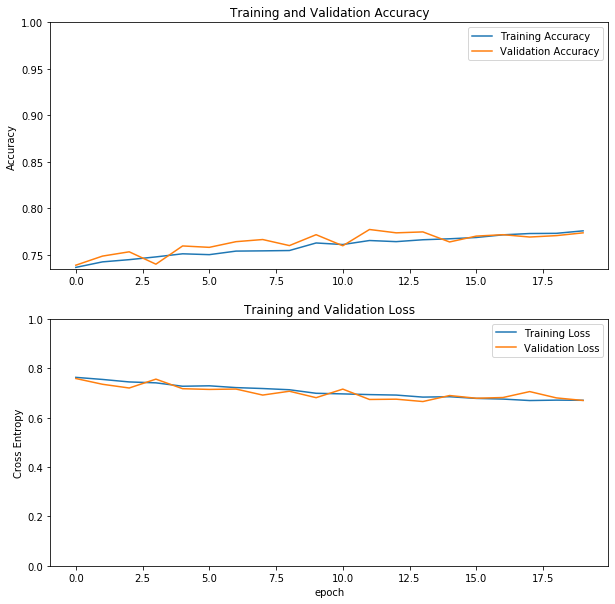

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 0.6691274238109589
Accuracy: 0.7735
